# BigMart Sales Prediction

#### 1) Problem Statement
- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

#### Business Goal: 
- Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

#### Analysis:
- Type of problem:- Supervised Machine Learning (Linear Regression) Problem
- Target feature : Item_Outlet_Sales

### 2) Hypothesis Generation
- 1) City Type: Stores located in urban cities should have higher sales because of the higher income levels of people there.

- 2) Store Location: Store located in popular market place shoud have higher Sales

- 3) Populted City: City with high population should have higher Sales.

- 4) Store capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would     prefer getting everything from one place.

- 5) Branded Products: Branded Products will have higher Sales.

- 6) Product Visbility: The location of product in a store will impact sales. Ones which are right at entrance will catch the        eye of customer first rather than the ones in back.

- 7) Product Frequency: More frequnct products will have high Sales.

- 8) Utilities: Daily Basic Products should have higher Sales.

### 3) Loading Packages and Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [5]:
df_train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
# Rows and columns
print(f'Training Dataset (row, col): {df_train.shape} \n\nTesting Dataset (row, col): {df_test.shape}')

Training Dataset (row, col): (8523, 12) 

Testing Dataset (row, col): (5681, 11)


- In our dataset there are 8523 different items with 12 features.

In [8]:
#info() is used to check the Information about the data and the datatypes of each respective attribute
print("Training set-: \n")
print(df_train.info())
print("\nTesting set-: \n")
print(df_test.info())

Training set-: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Testing set-: 

<class

### 4) Data structure and Content:

##### Numerical features:
  - Item_Weight : Weight of the product or item.
  - Item_Visibility : The % of the total display area of all products in a store allocated to the particular product.
  - Item_MRP : Maximum Retail Price (list price) of the product
  - Outlet_Establishment_Year : The year in which the store was established.
  - Item_Outlet_Sales : sales of the product in a particular store. This is the target variable to be predicted.
  
##### Categorical features:
  - Item_Identifier : Unique product ID (we would want to drop this column later)
  - Item_Fat_Content : Whether the product is low, fat or not
  - Item_Type : The category to which the product belongs.
  - Outlet_Identifier : Unique store ID
  - Outlet_Size : The size of the store in terms of ground area covered.
  - Outlet_Location_Type : The type of city in which the store is located.
  - Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket.

In [9]:
# The describe() method help to see data spread for numerical values by default : min, max, mean, percentiles...
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [10]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Observations
- There are a total of 8523 observations with 12 columns
- Null values exist for Item_Weight and Outlet_Size
- Item_Identifier and Outlet_Identifier are Ids and will not contribute in prediction of Item_Outlet_sales which is our output     variable.
- Item_Fact_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type are categorical variable.

In [11]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# lets check missing values.
(df_train.isna().sum()/ df_train.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Item_Weight has around 17% missing Values and Outlet_Size has around 28%

In [13]:
df_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

###  Missing Value Treatment

In [14]:
# train 
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

- Since the Outlet_Size is a categorial variable I can change this missing values with "Mode"(i.e. Most Repeated Value)

In [15]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [16]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

In [17]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
df_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [19]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
# Combine Item_Type, and create new category
df_train['Item_Type_Combined'] = df_train.Item_Identifier.apply(lambda x:x[0:2])
df_train['Item_Type_Combined'] = df_train['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable']) 
df_train.Item_Type_Combined.value_counts()

Item_Type_Combined
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

### 5) Exploratory Data Analysis

#### Univariate Analysis

In [21]:
numeric_cols = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

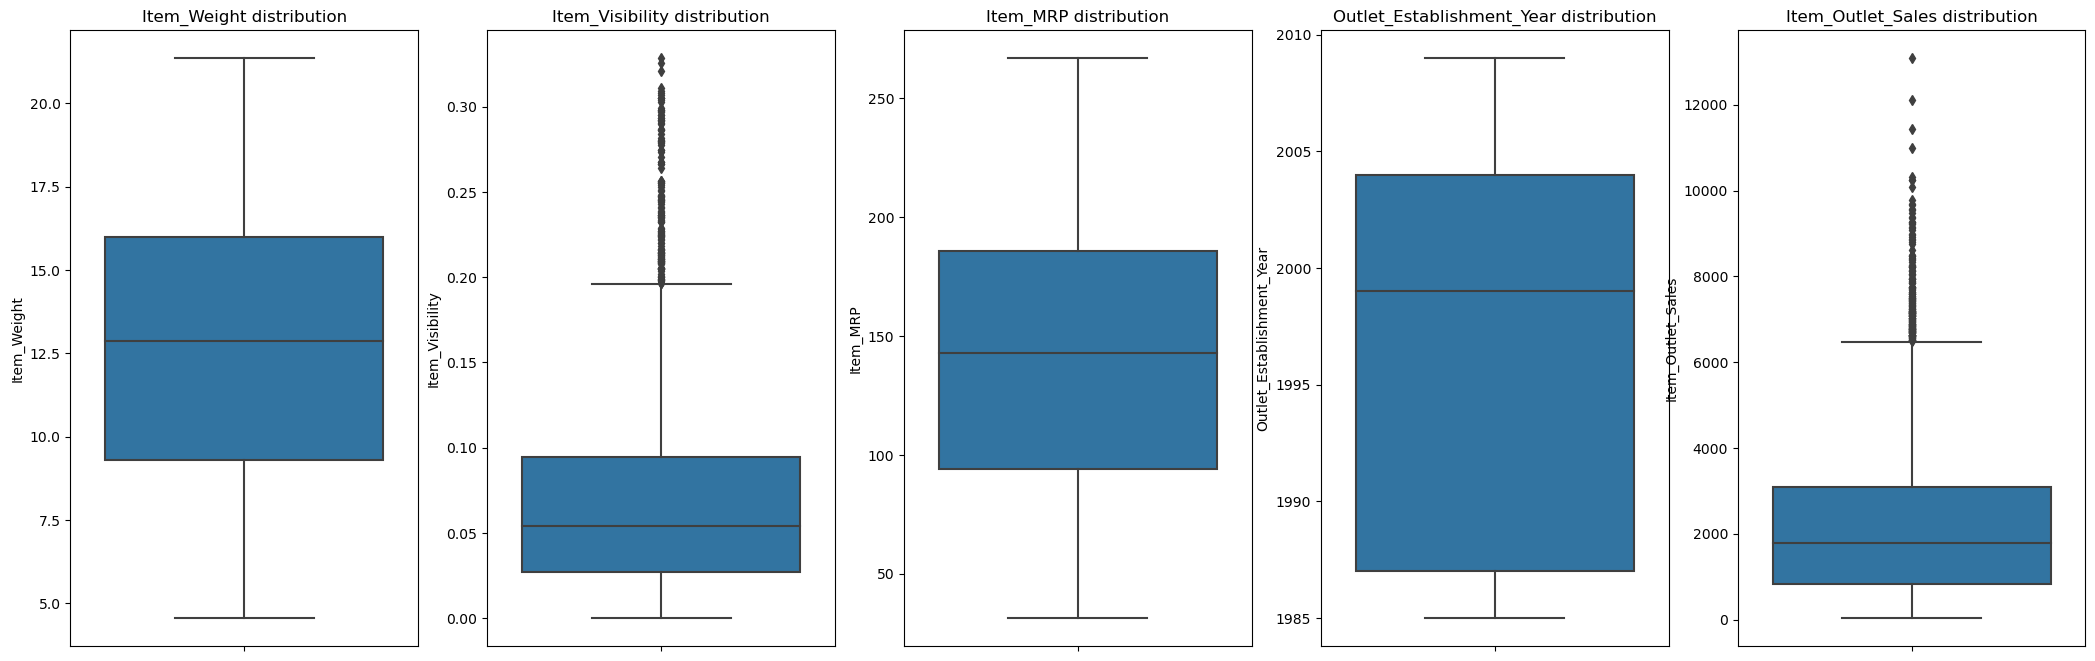

In [22]:
#finding Outliers
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.boxplot(data=df_train, y=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

###### Observations:

- There are almost no outliers in the Item_Weight, Item_MRP and Outlet_Establishment_Year features.
- Conversely there are some outliers to be removed in the Item_Visibility and Item_Outlet_Sales features.

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

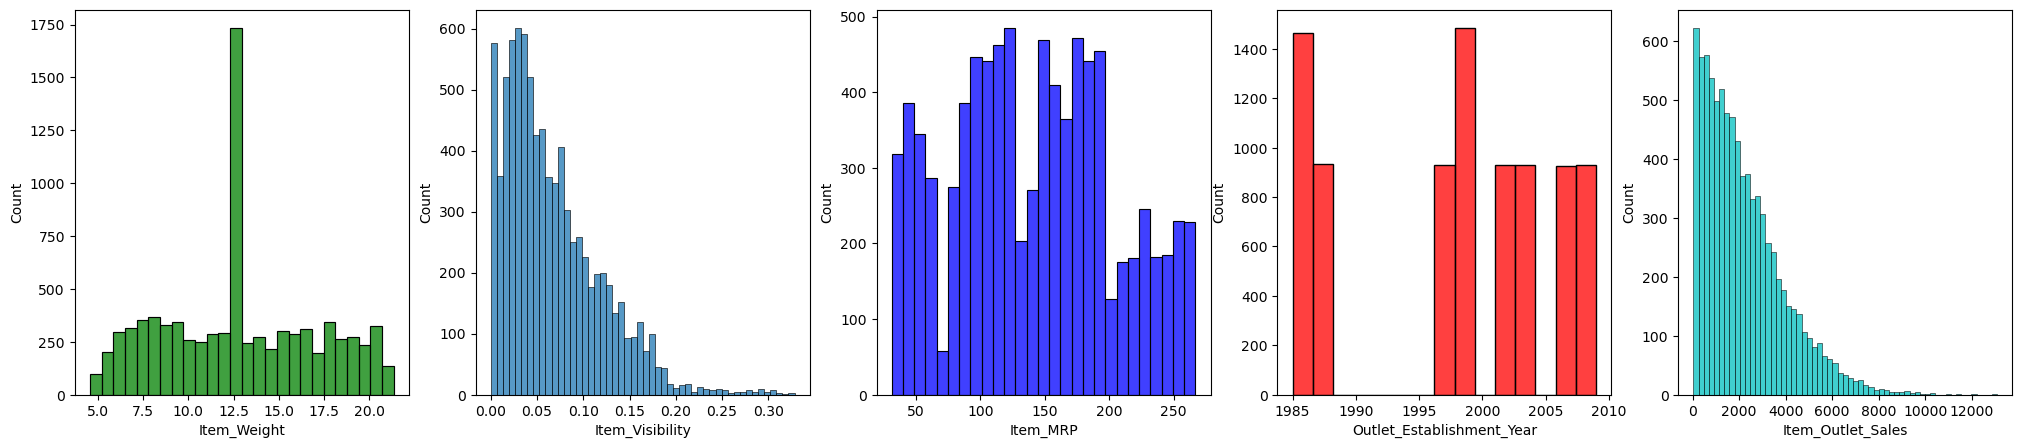

In [23]:
fig, axs = plt.subplots(ncols=5,figsize=(25,5))
sns.histplot(df_train['Item_Weight'], ax =axs[0], color='g')
sns.histplot(df_train['Item_Visibility'], ax =axs[1])
sns.histplot(df_train['Item_MRP'], ax =axs[2], color='b')
sns.histplot(df_train['Outlet_Establishment_Year'], ax =axs[3], color='r')
sns.histplot(df_train['Item_Outlet_Sales'], ax =axs[4], color='c')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

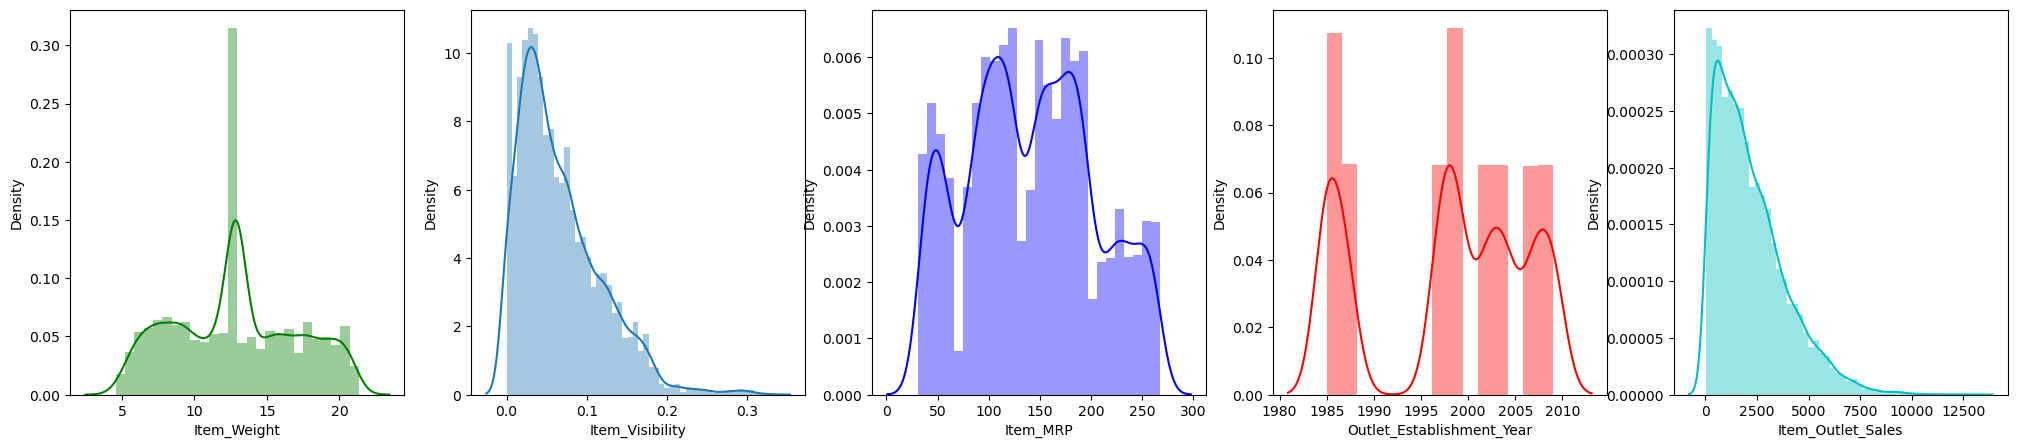

In [24]:
fig, axs = plt.subplots(ncols=5,figsize=(25,5))
sns.distplot(df_train['Item_Weight'], ax =axs[0], color='g')
sns.distplot(df_train['Item_Visibility'], ax =axs[1])
sns.distplot(df_train['Item_MRP'], ax =axs[2], color='b')
sns.distplot(df_train['Outlet_Establishment_Year'], ax =axs[3], color='r')
sns.distplot(df_train['Item_Outlet_Sales'], ax =axs[4], color='c')

###### Observations:

- We observe that the item weight range from 5 Kg to 20 Kg.
- Item_Visibility feature is right skewed.
- There are more products in the range of 100 MRP - 180 MRP in the Item_MRP feature
- We can observe that a lots of stores have been established in the years 1985, 1998 etc... and there was no store establishment   between 1990 and 1995.
- Item_Outlet_Sales feature is right skewed. We can may be try to do a transformation in order to obtain a normal ou Gaussian -   distribution

In [25]:
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Type_Combined']

In [26]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [27]:
# replace same subcaregory 
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'Low Fat':'Low_fat',
                                                                        'Regular':'Regular',
                                                                          'low fat':'Low_fat',
                                                                          'LF':'Low_fat',
                                                                          'reg':'Regular'})

df_train['Item_Fat_Content'].unique()

array(['Low_fat', 'Regular'], dtype=object)

In [28]:
df_train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_fat    5517
Regular    3006
Name: count, dtype: int64

In [29]:
categorical_cols = [ 'Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for col in categorical_cols:
    print(f"Number of values in the {col} column is: \n{df_train[col].value_counts() }")
    print("--" * 40)
    

Number of values in the Item_Fat_Content column is: 
Item_Fat_Content
Low_fat    5517
Regular    3006
Name: count, dtype: int64
--------------------------------------------------------------------------------
Number of values in the Item_Type column is: 
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
--------------------------------------------------------------------------------
Number of values in the Outlet_Size column is: 
Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64
-----------------

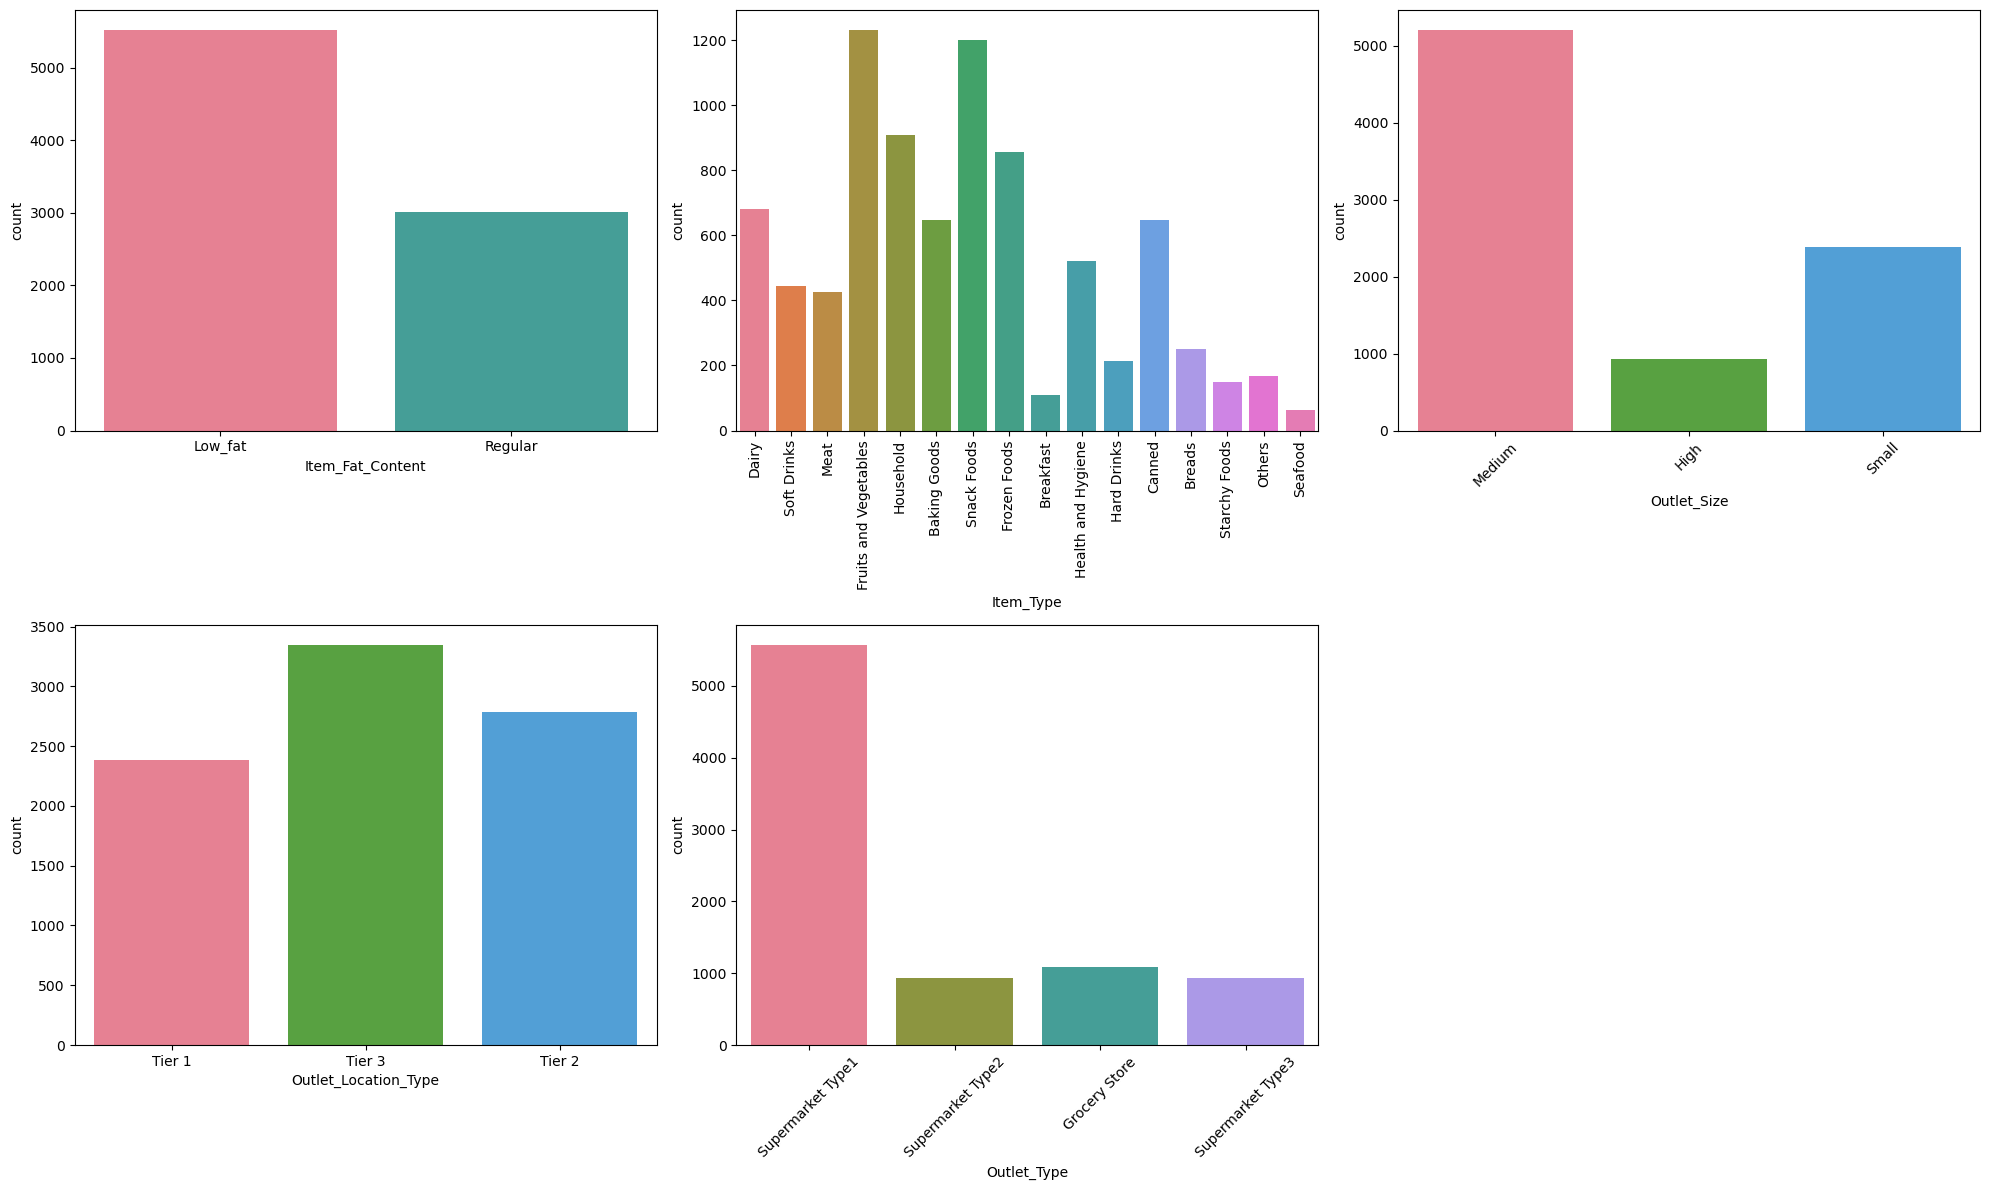

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

sns.countplot(x="Item_Fat_Content", data=df_train, palette='husl', ax=axs[0, 0])
#axs[0, 0].set_title('Item Fat Content')

sns.countplot(x="Item_Type", data=df_train, palette='husl', ax=axs[0, 1])
#axs[0, 1].set_title('Item Type')
axs[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(x="Outlet_Size", data=df_train, palette='husl', ax=axs[0, 2])
#axs[0, 2].set_title('Outlet Size')
axs[0, 2].tick_params(axis='x', rotation=45)

sns.countplot(x="Outlet_Location_Type", data=df_train, palette='husl', ax=axs[1, 0])
#axs[1, 0].set_title('Outlet Location Type')

sns.countplot(x="Outlet_Type", data=df_train, palette='husl', ax=axs[1, 1])
#axs[1, 1].set_title('Outlet Type')
axs[1, 1].tick_params(axis='x', rotation=45)

# Remove the empty subplot
fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()


##### Observations:

- Purchase Preference: The data suggests that customers prefer buying Low Fat items over Regular Fat items.

- Popular Items: Fruits and Vegetables seem to be popular among customers, indicating a focus on healthy eating habits or        cooking preferences.

- Outlet Size Distribution: There are more outlets of medium size compared to small or large outlets, which could indicate a balanced distribution strategy.

- Location Preference: The concentration of outlets in Tier 3 cities suggests either higher demand or a strategic business decision to target these locations.

- Store Type: The majority of supermarkets belong to Type 1, which could imply a specific business model or market strategy that favors this type of supermarket.

### Bivariate Analysis

- Numerical-Numerical

Text(0, 0.5, 'Item Outlet Sales')

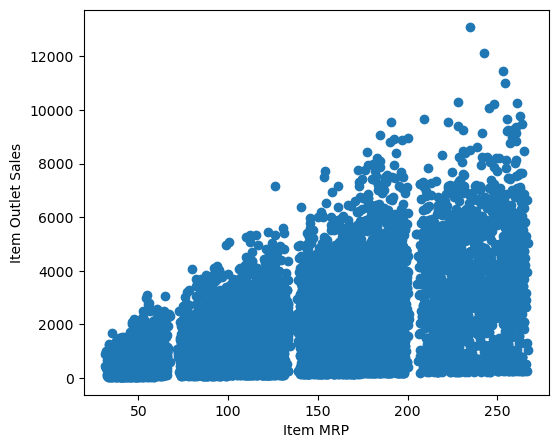

In [31]:
plt.figure(figsize=(6,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df_train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Text(0, 0.5, 'Item Outlet Sales')

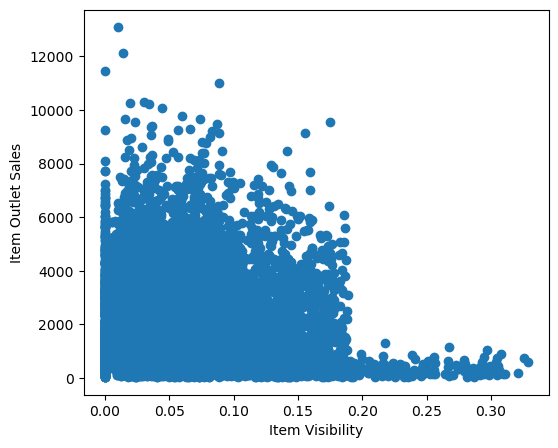

In [32]:
plt.figure(figsize=(6,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_Visibility',data=df_train)
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')

- Item_Visibility: Looks like it has negative correlation.
- Item_MRP: Items with higer MRP Sales tends to sell better.

- Numerical-Categorical

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

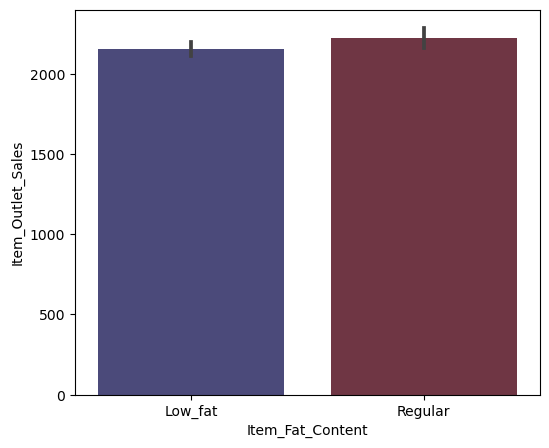

In [33]:
plt.figure(figsize=(6,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_train,palette='icefire')

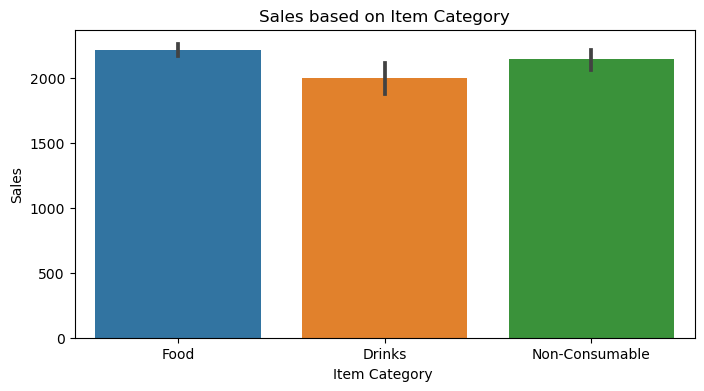

In [34]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(8,4))
sns.barplot(data=df_train,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.show()

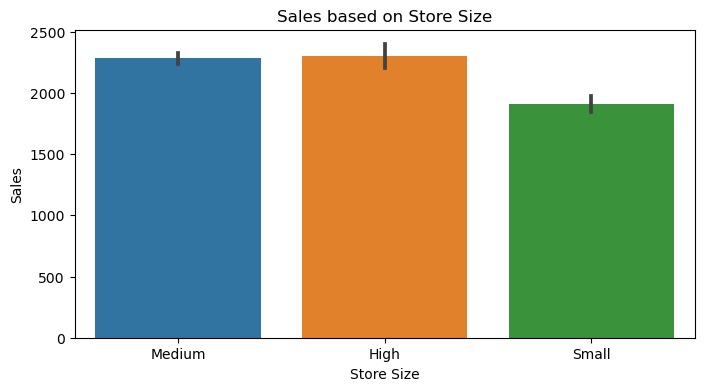

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(data=df_train,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.show()

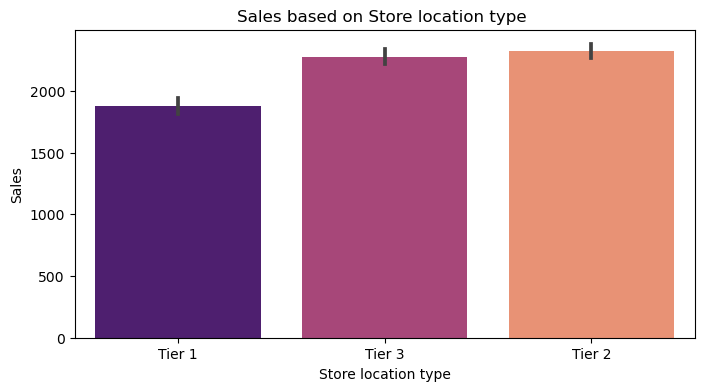

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_train,palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


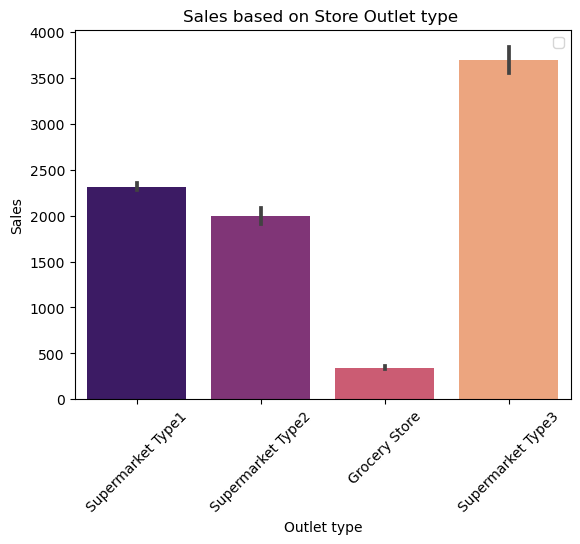

In [37]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df_train,palette='magma')
plt.title('Sales based on Store Outlet type ')
plt.xlabel('Outlet type')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()

- Item_Type_Combined: Based on Categories, Food has most Sells, But difference is very small.
- Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
- Outlet_Type: Most Sells are through SuperMarket Type3 surprisingly not Type1.
- Outlet_Size: Sells are mostly even in Medium and High size Stores.
- Outlet_Location_Type: Most sells are through Tier3 and Tier2, Tier2 is slightly higher.

In [38]:
#df_train.corr()

### Multivariate

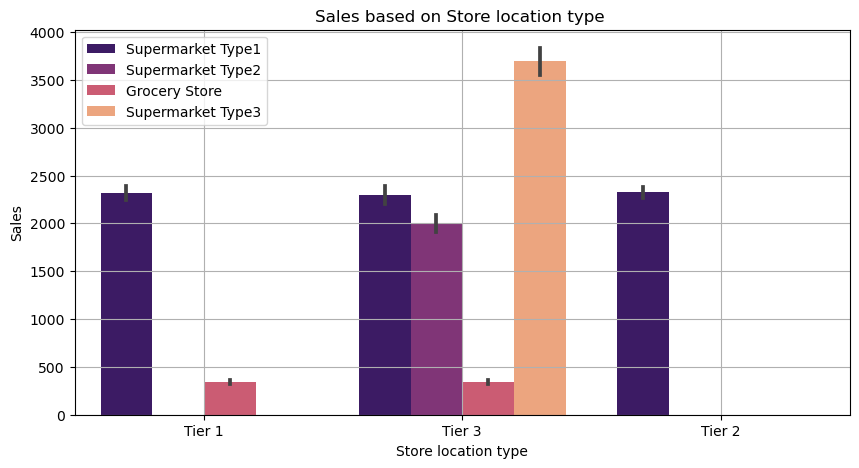

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_train,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()

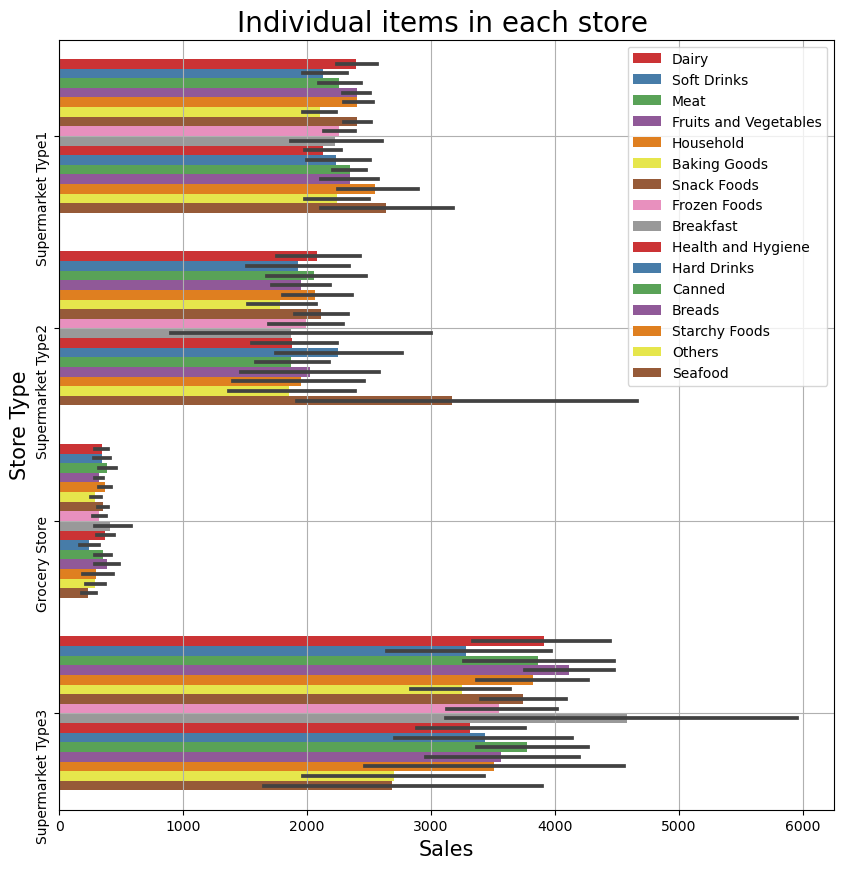

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_train,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

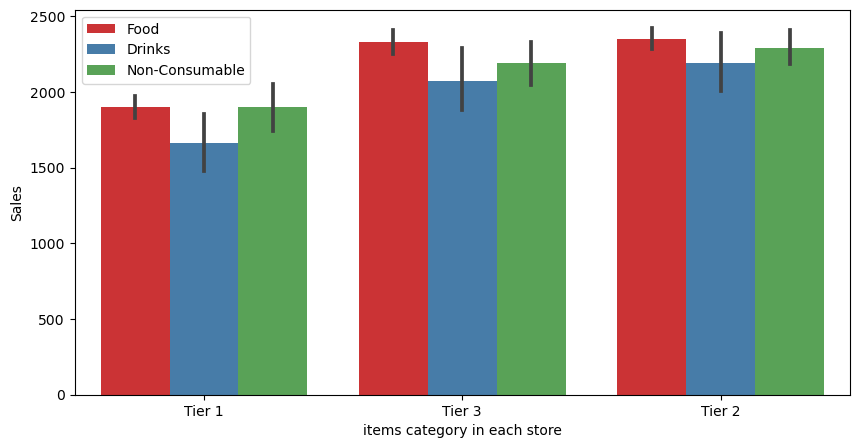

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_train,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

##### Observations:
- Seafood is the most item_type sold in SuperMarket 1 and 2, Grocery store has less sales.
- Only Teir3 has all Outlet_Type, and SuperMarket type3 has most sales..
- Outlet_Location_Type has almost equal sales based on Item_Type_combined.

### Feature Engineering

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


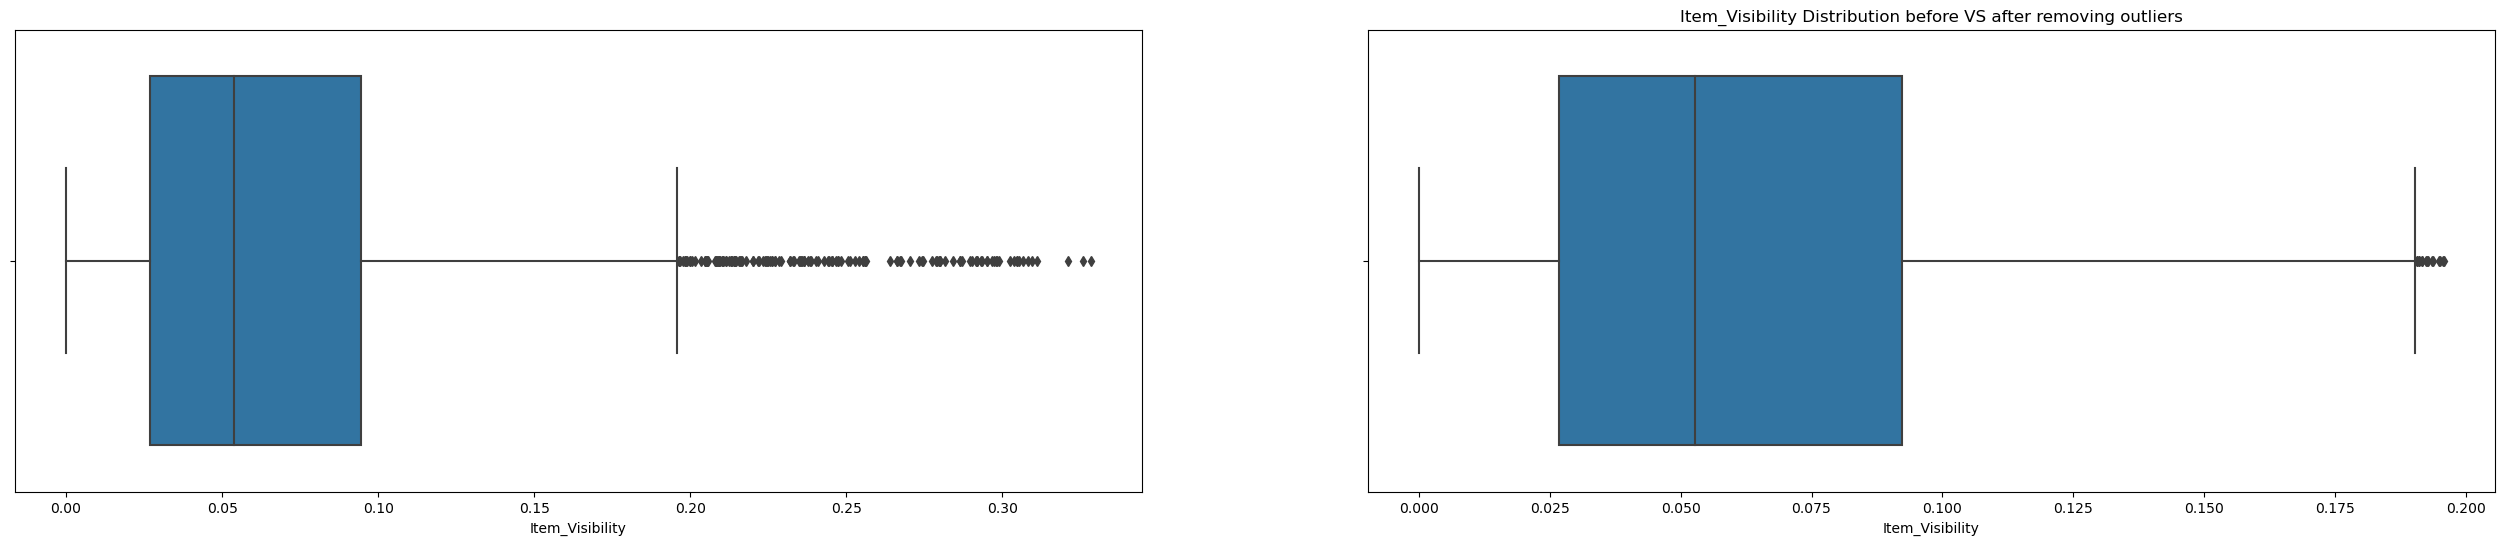

In [42]:
 #function to detect outliers using the IQR method

def detect_outliers(df_train, feature):
    Q1  = df_train[feature].quantile(0.25)
    Q3  = df_train[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = detect_outliers(df_train, "Item_Visibility")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=df_train['Item_Visibility'], ax=ax[0])

# removing outliers using the above function
df_train = df_train[(df_train['Item_Visibility'] > lower) & (df_train['Item_Visibility'] < upper)]

sns.boxplot(x=df_train['Item_Visibility'], ax=ax[1])
plt.title('Item_Visibility Distribution before VS after removing outliers')
plt.show()

In [43]:
#q1=df_train['Item_Outlet_Sales'].quantile(0.25)
#q2=df_tra#in['Item_Outlet_Sales'].quantile(0.75)
#IQR=q2-q1

In [44]:
#IQR

In [45]:
#df_train=df_train[~((df_train<(q1-1.5*IQR))|(df_train>(q2+1.5*IQR))).any(axis=1)]

Upper limit:  6499.2067
Lower limit:  -2499.7460999999994


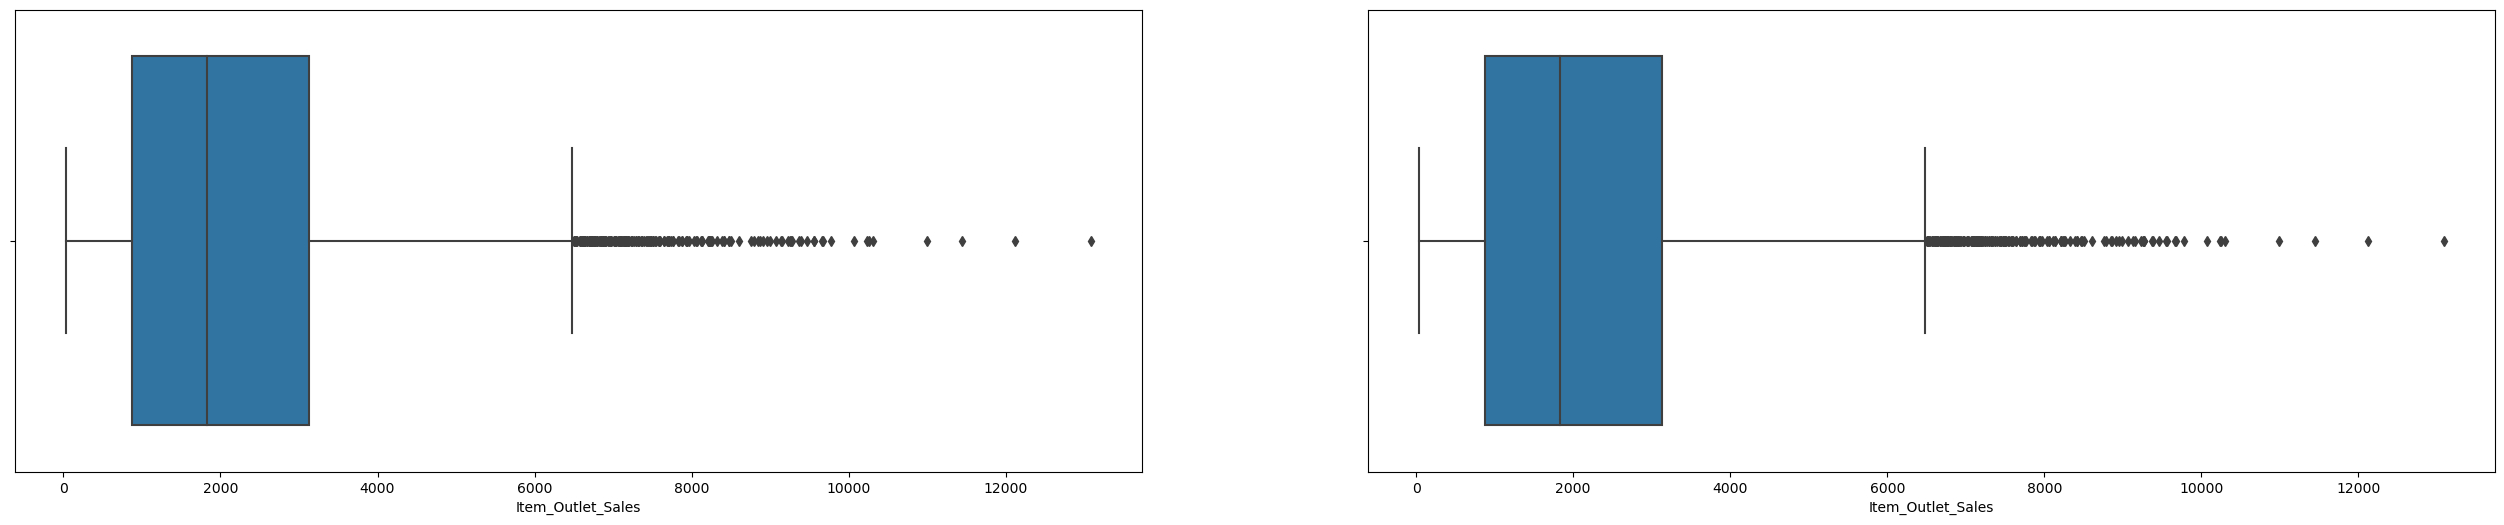

In [46]:
# detect outliers in the Item_Outlet_Sales feature
upper, lower = detect_outliers(df_train, "Item_Outlet_Sales")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=df_train['Item_Outlet_Sales'], ax=ax[0])

# removing outliers using the same function
train = df_train[(df_train['Item_Outlet_Sales'] > lower) & (df_train['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=df_train['Item_Outlet_Sales'], ax=ax[1])

plt.show()

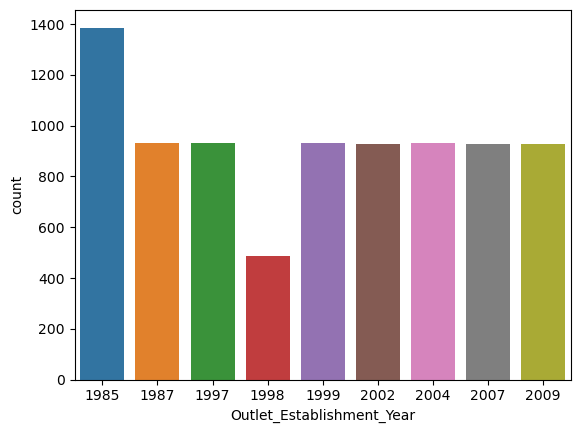

In [47]:
df_train['Outlet_Age'] = 2024 - df_train['Outlet_Establishment_Year']
df_test['Outlet_Age'] = 2024 - df_test['Outlet_Establishment_Year']

#del df_train['Outlet_Establishment_Year']
#del df_test['Outlet_Establishment_Year']

sns.countplot(x=df_train['Outlet_Establishment_Year']);

- Outlet_Age: Most Common Outlets are 39 year's old.

In [48]:
# selecting required features
df_train.drop(['Item_Identifier','Outlet_Identifier', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Age'],axis=1,inplace=True)

### 10).Encoding Categorical Variables

##### Label Encoding

In [49]:
df_train_cat = df_train.select_dtypes(object)
df_train_num = df_train.select_dtypes(["int64", "float64"])

In [50]:
df_train_cat

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,Low_fat,Medium,Tier 1,Supermarket Type1,Food
1,Regular,Medium,Tier 3,Supermarket Type2,Drinks
2,Low_fat,Medium,Tier 1,Supermarket Type1,Food
3,Regular,Medium,Tier 3,Grocery Store,Food
4,Low_fat,High,Tier 3,Supermarket Type1,Non-Consumable
...,...,...,...,...,...
8518,Low_fat,High,Tier 3,Supermarket Type1,Food
8519,Regular,Medium,Tier 2,Supermarket Type1,Food
8520,Low_fat,Small,Tier 2,Supermarket Type1,Non-Consumable
8521,Regular,Medium,Tier 3,Supermarket Type2,Food


In [51]:
for col in df_train_cat:
    le = LabelEncoder()
    df_train_cat[col] = le.fit_transform(df_train_cat[col])   

In [52]:
df_train_cat

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,0,1,0,1,1
1,1,1,2,2,0
2,0,1,0,1,1
3,1,1,2,0,1
4,0,0,2,1,2
...,...,...,...,...,...
8518,0,0,2,1,1
8519,1,1,1,1,1
8520,0,2,1,1,2
8521,1,1,2,2,1


In [53]:
df_train = pd.concat([df_train_cat, df_train_num], axis=1)

In [54]:
df_train.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0,1,0,1,1,9.30,0.016047,249.8092,3735.1380
1,1,1,2,2,0,5.92,0.019278,48.2692,443.4228
2,0,1,0,1,1,17.50,0.016760,141.6180,2097.2700
3,1,1,2,0,1,19.20,0.000000,182.0950,732.3800
4,0,0,2,1,2,8.93,0.000000,53.8614,994.7052


### Pre-Processing

In [55]:
x=df_train.drop('Item_Outlet_Sales',axis=1)
y=df_train['Item_Outlet_Sales']

In [56]:
x

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Item_Weight,Item_Visibility,Item_MRP
0,0,1,0,1,1,9.300,0.016047,249.8092
1,1,1,2,2,0,5.920,0.019278,48.2692
2,0,1,0,1,1,17.500,0.016760,141.6180
3,1,1,2,0,1,19.200,0.000000,182.0950
4,0,0,2,1,2,8.930,0.000000,53.8614
...,...,...,...,...,...,...,...,...
8518,0,0,2,1,1,6.865,0.056783,214.5218
8519,1,1,1,1,1,8.380,0.046982,108.1570
8520,0,2,1,1,2,10.600,0.035186,85.1224
8521,1,1,2,2,1,7.210,0.145221,103.1332


In [57]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8379, dtype: float64

In [177]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=0)

In [178]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [179]:
x_train= sc.fit_transform(xtrain)

In [180]:
x_test= sc.transform(xtest)

In [181]:
x_train

array([[-0.73788214, -0.28078245,  1.09934194, ...,  0.00253996,
        -1.36155561, -0.32480311],
       [ 1.35522999, -1.95821986,  1.09934194, ...,  0.76692782,
        -1.06767776, -0.53837614],
       [-0.73788214,  1.39665496, -0.1355984 , ...,  0.27185106,
        -0.84818511, -0.59346231],
       ...,
       [-0.73788214, -0.28078245, -0.1355984 , ..., -0.05820011,
        -0.83517903, -1.70833336],
       [-0.73788214, -0.28078245,  1.09934194, ...,  0.00253996,
        -1.36155561, -0.66090202],
       [-0.73788214, -1.95821986,  1.09934194, ..., -0.64757721,
        -0.18068472,  0.88843656]])

In [182]:
x_test

array([[-0.73788214, -0.28078245,  1.09934194, ..., -1.31710958,
        -1.04825372, -0.37189258],
       [-0.73788214, -1.95821986,  1.09934194, ..., -1.65659079,
        -1.36155561,  0.45227773],
       [-0.73788214, -1.95821986,  1.09934194, ..., -1.5045315 ,
         1.32970201,  2.00868054],
       ...,
       [-0.73788214, -0.28078245,  1.09934194, ...,  0.00253996,
        -1.07909837,  1.20050361],
       [ 1.35522999, -0.28078245,  1.09934194, ...,  0.00253996,
        -0.45825916, -1.41128543],
       [ 1.35522999, -0.28078245, -0.1355984 , ...,  0.30721369,
        -0.83252966,  0.89973225]])

In [183]:
ytrain

2522    2396.8800
761      323.5788
3837    1435.4648
5433    3372.9428
5963    3398.2432
          ...    
4444    1744.3960
8027    4921.5936
4936     529.3110
3315    2956.1520
2777     595.2252
Name: Item_Outlet_Sales, Length: 6703, dtype: float64

In [184]:
ytest

2301    1864.2400
2898    2376.9060
3714    5299.7680
200      745.6960
3780    4604.6728
          ...    
7775    3757.1094
5344     135.8232
3407    7334.4528
6804    1597.9200
1453    3731.8090
Name: Item_Outlet_Sales, Length: 1676, dtype: float64

In [185]:
linreg = LinearRegression()
rf = RandomForestRegressor()
xgb = XGBRegressor()

In [186]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(f"MAE -: {MAE(ytest, ypred)}")
    print(f"MSE -: {MSE(ytest, ypred)}")
    print(f"RMSE -: {np.sqrt(MSE(ytest, ypred))}")
    print(f"R-Squared -: {r2_score(ytest, ypred)}")

In [187]:
mymodel(linreg)                    

MAE -: 877.7901640238491
MSE -: 1375915.3987586405
RMSE -: 1172.9942023550843
R-Squared -: 0.5145161328543195


In [188]:

print(f'Test score     = {linreg.score(xtest, ytest)}')

Training score = 0.5011477148796193
Test score     = 0.5145161328543195


In [189]:
mymodel(rf)

MAE -: 793.4886891861577
MSE -: 1287134.12352832
RMSE -: 1134.519335898829
R-Squared -: 0.5458420972761349


In [215]:
#test score
print(f'Test score     = {rf.score(xtest, ytest)}')

Test score     = 0.5966213034540668


In [191]:
mymodel(xgb)

MAE -: 817.0665904001669
MSE -: 1376757.7450406977
RMSE -: 1173.3532055782257
R-Squared -: 0.5142189157936936


In [214]:
#test score
print(f'Test score     = {xgb.score(xtest, ytest)}')

Test score     = 0.5141897111367202


In [193]:
### Hyperparameter Tunning

In [194]:
from sklearn.linear_model import Ridge, Lasso

In [195]:
# Ridge
l2 = Ridge(alpha=5)
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)
print(r2_score(ytest, ypred))

0.5145243379497951


In [196]:
# Lasso
l1 = Lasso(alpha=4)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)
print(r2_score(ytest, ypred))

0.5137712098790549


In [197]:
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain, ytrain)
    print(f"{i} -: {l2.score(xtest, ytest)}")

0 -: 0.5145161328543193
1 -: 0.5145286789951341
2 -: 0.51453384454601
3 -: 0.5145338853270689
4 -: 0.5145303546414411
5 -: 0.5145243379497951
6 -: 0.5145166030523122
7 -: 0.5145076983842718
8 -: 0.51449801864303
9 -: 0.5144878493843366
10 -: 0.5144773978083579
11 -: 0.514466814313456
12 -: 0.5144562077779135
13 -: 0.5144456565180314
14 -: 0.5144352162259809
15 -: 0.5144249257722819
16 -: 0.5144148114818361
17 -: 0.5144048903077898
18 -: 0.514395172202241
19 -: 0.5143856618967684
20 -: 0.5143763602459515
21 -: 0.5143672652450448
22 -: 0.5143583728031498
23 -: 0.5143496773318748
24 -: 0.5143411721940372
25 -: 0.5143328500457196
26 -: 0.5143247030967393
27 -: 0.5143167233084831
28 -: 0.5143089025435261
29 -: 0.5143012326780438
30 -: 0.5142937056854655
31 -: 0.5142863136978822
32 -: 0.5142790490502398
33 -: 0.5142719043112155
34 -: 0.5142648723038182
35 -: 0.5142579461180713
36 -: 0.5142511191176276
37 -: 0.5142443849417571
38 -: 0.5142377375038396
39 -: 0.5142311709872442
40 -: 0.51422467

In [198]:
# Cross Validation

In [199]:
from sklearn.model_selection import cross_val_score

In [207]:
cvs = cross_val_score(linreg, x,y, cv=10)

In [208]:
cvs

array([0.51322031, 0.53280907, 0.49448005, 0.50356661, 0.46486756,
       0.50554624, 0.51947123, 0.48442502, 0.51564743, 0.48301938])

In [209]:
cvs.mean()

0.5017052891973531

##### Random Forest

In [210]:
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=4, random_state=1)

In [211]:
mymodel(rf)

MAE -: 750.5732722350474
MSE -: 1143220.1926128957
RMSE -: 1069.2147551417795
R-Squared -: 0.5966213034540668


In [212]:
# XGBoost
xgb = XGBRegressor(n_estimators=200, booster='gblinear',n_jobs=4, random_state=1)

In [213]:
mymodel(xgb)

MAE -: 877.8049983368722
MSE -: 1376840.5142941466
RMSE -: 1173.3884754394628
R-Squared -: 0.5141897111367202


# Conclusion

- The data suggests a strong market for medium-sized supermarkets in Tier 3 cities, where customers prefer purchasing Low Fat     items and items priced between 100 and 180 MRP. 
- Fruits and Vegetables are popular items, indicating a preference for healthy options. 
- The negative correlation between item visibility and sales suggests that improving visibility could lead to increased sales. - - Supermarket Type 3, despite being less common, appears to be a successful model, suggesting potential growth opportunities in   this segment.



##### Recommendations

- Sales in large stores like Supermarket Type 3 has more sales than others. These sales of these stores should be maintains and if possible improved.
- Sales in other smaller stores such as grocery stores and others need strategic planning to improve the sales.

### Save Model

In [216]:
import joblib

In [218]:
joblib.dump(RandomForestRegressor,r'C:\Users\akole\Downloads\jupyter Notebook\Machine Learning\Technocolab\RandomForestRegressor.sav')


['C:\\Users\\akole\\Downloads\\jupyter Notebook\\Machine Learning\\Technocolab\\RandomForestRegressor.sav']

In [223]:
model=joblib.load(r'C:\Users\akole\Downloads\jupyter Notebook\Machine Learning\Technocolab\RandomForestRegressor.sav')

# END